In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) that report risk to assets, capacity, and resulting risk to welfare on a simpliied map of the Philippines.


## Get the Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

In [3]:
df_with_results = pd.read_csv("results/all_data_and_results.csv", index_col=0, skiprows=[0,2])
df_with_results.head()

,pop,cp,cr,pov_head,gdp_pc_pp,shewp,shewr,social_p,social_r,gdp_pc_pp_nat,...,dK,delta_W,dcap,dcar,dKtot,dWpc_curency,dWtot_currency,risk,resilience,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Abra,51167,92.828972,203.891421,0.271936,173.689487,0.063163,0.173531,0.173531,0.203457,234.602577,...,0.614174,0.000019,58.743861,113.406393,2973.078799,0.109730,5614.561571,0.000632,0.529530,0.000335
Agusan del Norte,141357,82.348426,234.816324,0.276778,192.616487,0.249100,0.147336,0.147336,0.226521,234.602577,...,4.450667,0.000133,63.714329,143.515689,66857.906674,0.871012,123123.615602,0.004522,0.543014,0.002456
Agusan del Sur,141595,83.304081,216.087522,0.372958,166.564929,0.139189,0.126444,0.126444,0.113334,234.602577,...,4.185219,0.000159,69.722530,159.377601,68827.651156,1.140791,161530.238947,0.006849,0.426098,0.002918
Aklan,123269,79.445859,211.619510,0.204461,184.595206,0.128517,0.184183,0.184183,0.239542,234.602577,...,20.030933,0.000612,75.992018,165.078167,2469193.051555,37.882087,4669686.938954,0.205217,0.528771,0.108513
Albay,267030,76.582210,224.008585,0.339106,174.015387,0.172775,0.201804,0.201804,0.213554,234.602577,...,1.282702,0.000047,61.240437,143.946460,342519.944089,2.898739,774050.339427,0.016658,0.442503,0.007371


## Map the data

The following library, coded for this project, allows to plot maps. It produces [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps, that can be visualized in a browser, out of the box. 

It can also automatically transform those SVG maps into [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) maps, but for that it requires that the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. 
Finally, to automatically merge the map and the legend in a single file, it requires [ImageMagick](http://www.imagemagick.org/script/index.php).

In [4]:
#this library contains ad hoc functions, coded for this project, that allow to produce maps 
from maps_lib import * 

In [5]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

The [blank map of the Philippines](map/PHL_adm1.svg) we use here is an SVG.
(It was built starting from a [shapefile](https://en.wikipedia.org/wiki/Shapefile) from [GADM.org](http://gadm.org), that was simplified with  [mapshaper.org](http://mapshaper.org) then converted to SVG with [Kartograph](http://kartograph.org/))

In [6]:
# path to the blank map 
svg_file_path = "map/BlankSimpleMap.svg"

#### First block: risk to assets 

Missing in series: Dinagat Islands


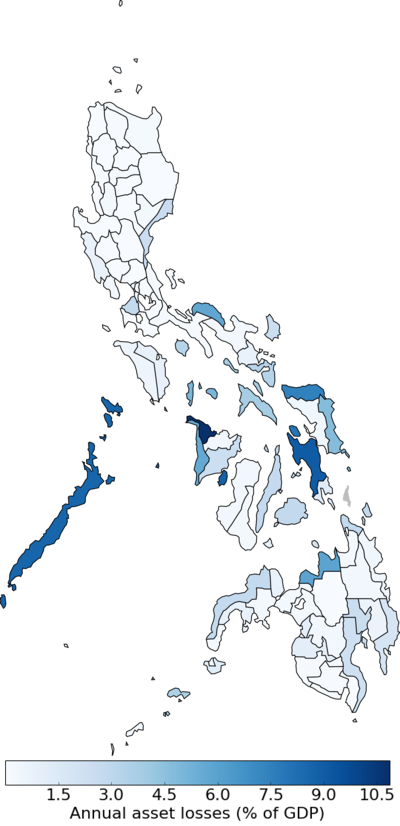

In [10]:
make_map_from_svg(
        df_with_results.risk_to_assets, #data 
        svg_file_path,                  #path to blank map
        outname="asset_risk",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        color_maper=plt.cm.get_cmap("Blues"), #color scheme (from matplotlib. Chose them from http://colorbrewer2.org/)
        label="Annual asset losses (% of GDP)",
        new_title="Map of asset risk in the Philippines"  #title for the colored SVG
)

#### Second block: socio-economic capacity 

Missing in series: Dinagat Islands


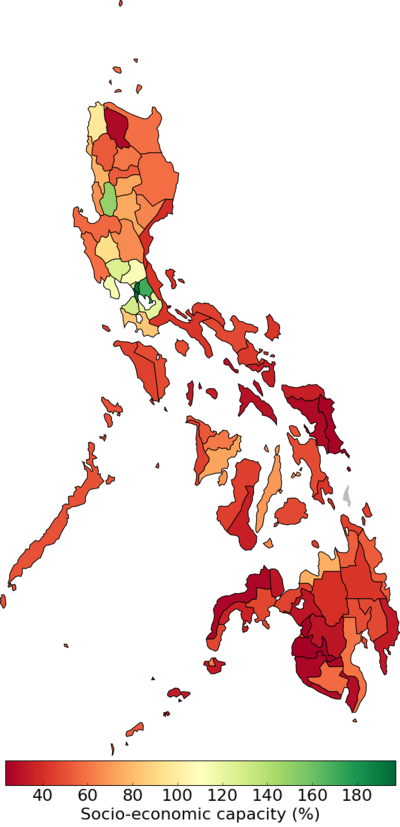

In [13]:
make_map_from_svg(
        df_with_results.resilience, 
        svg_file_path,
        outname="se_capacity", 
        color_maper=plt.cm.get_cmap("RdYlGn"), 
        label="Socio-economic capacity (%)",
        new_title="Map of socio-economic capacity in the Philippines")

#### Total risk to welfare ($\frac {\text{asset risk}} {\text{socio-economic capacity}}$)

Missing in series: Dinagat Islands


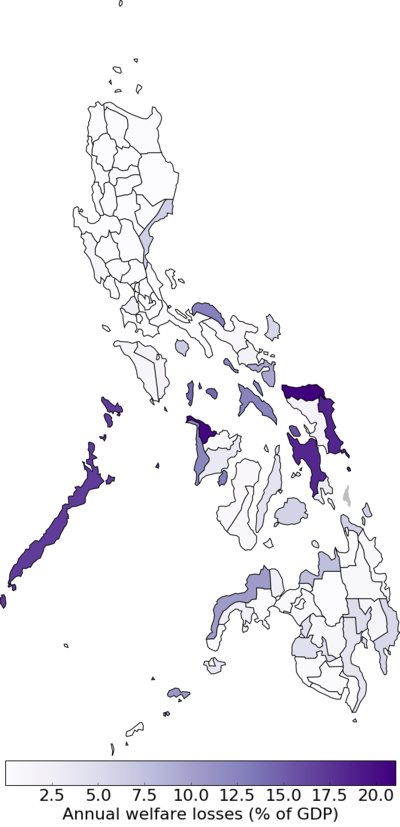

In [12]:
make_map_from_svg(
        df_with_results.risk, 
        svg_file_path,
        outname="welfare_risk", 
        color_maper=plt.cm.get_cmap("Purples"), 
        label="Annual welfare losses (% of GDP)",
        new_title="Map of welfare risk in the Philippines")